# Housing price prediction using random forest

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

### Read data ##

In [22]:
data = pd.read_csv('./data/linear_regression/kc_house_data.csv', header=0)
print(data.columns)
print(data)
x_columns = ['bedrooms', 'bathrooms','sqft_living']

X = data[x_columns]
Y = data[['price']]

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310

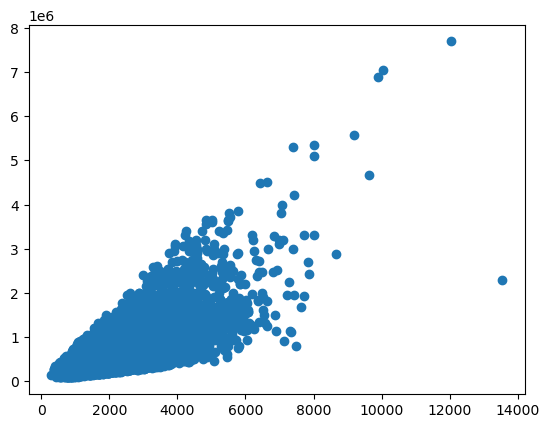

In [4]:
plt.figure()
plt.scatter(data[['sqft_living']].values, Y)
plt.show()

### Train the model

In [14]:
X_train, X_vali, y_train, y_valid = train_test_split(X, Y, random_state=0, test_size=0.2)
model = RandomForestRegressor(n_estimators=50)
model.fit(X_train, y_train)
# print(model.score)

c:\Users\miche\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=50)

### Evaluate the Model

In [30]:
y_predict = model.predict(X_vali)
mse = mean_squared_error(y_valid, y_predict)
print('{:,.0f}'.format(mse))

mae = mean_absolute_error(y_valid, y_predict)
print('{:,.0f}'.format(mae))

68,317,544,981
174,042


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

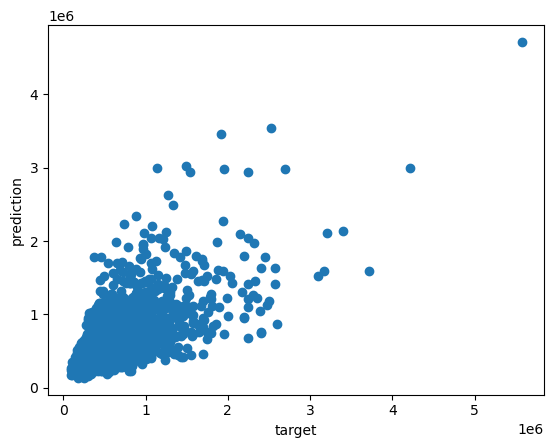

In [19]:
plt.scatter(y_valid, y_predict)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round(min(min(y_valid), min(y_predict)))
ymax = np.ceil(max(max(y_valid), max(y_predict)))
r = range(int(ymin), int(ymax) + 1)
plt.plot(r,r)
plt.show()

### Predict using other dataset with the model

In [ ]:
test_data =pd.DataFrame([[1,1,650]], columns=x_columns)
predict=model.predict(test_data)
print(predict)

[[221205.9254801]]
